<a href="https://colab.research.google.com/github/hikmah1/AnalisisGambarDanDataSains/blob/main/Klasifikasi_Penyakit_Jantung_Menggunakan_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv('./heart.csv') 
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [79]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [80]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

mengelompokkan data sesuai dengan target 

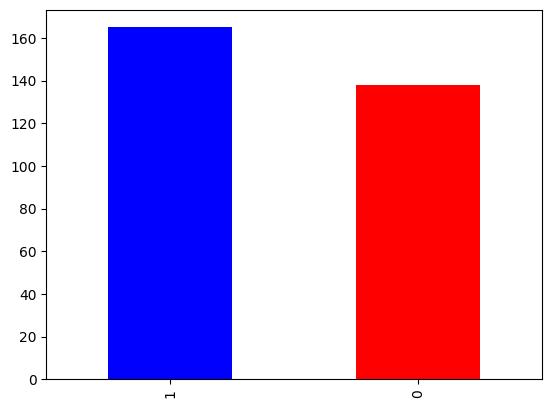

In [81]:
df["target"].value_counts().plot(kind="bar",color=["blue","red"]);

menampilkan kelompok target dalam bentuk diagram 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


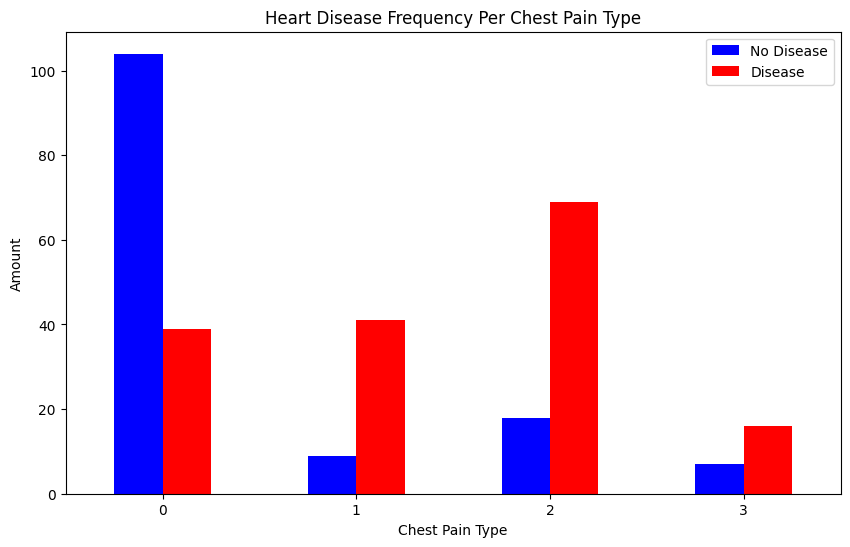

In [83]:
# Visualise relationship between chest pain type and target column
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["blue", "red"])

# Add details
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [84]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [85]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


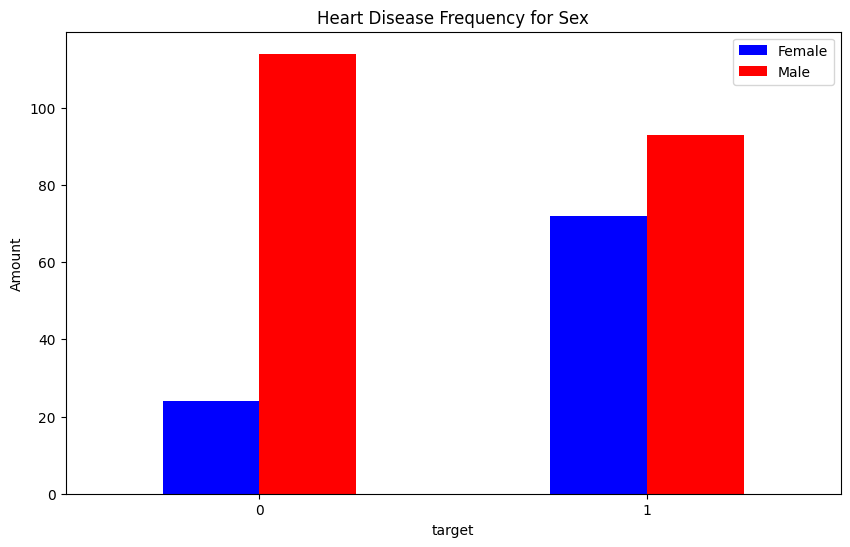

In [86]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["blue", "red"])

# Add details
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

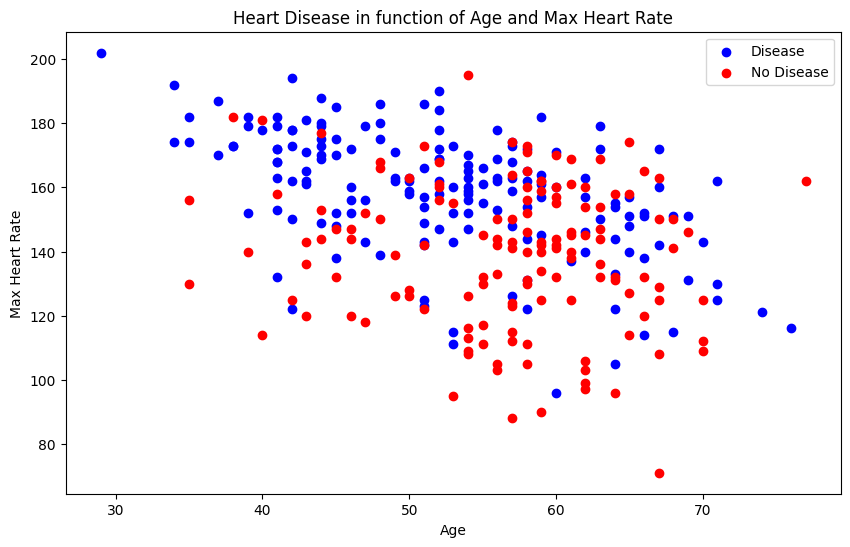

In [87]:
# create figure
plt.figure(figsize=(10, 6))

# scatter with filter data with target positive - heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="blue")

# scatter with target zero - no heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="red")

# add some description
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [88]:
df2 = df[(df['age']>40)&(df['age']<50)] 
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0


mengelompokkan data yang berumur 40-50 tahun

In [89]:
x = df.iloc[:,0:13] 
y = df.iloc[:,13]

x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


menampilkan age-thal klasifikasi target berisi 1 = penyakit jantung 0 = tidak ada

<function matplotlib.pyplot.ioff()>

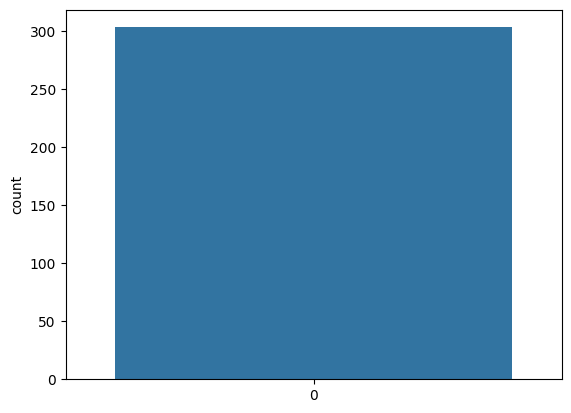

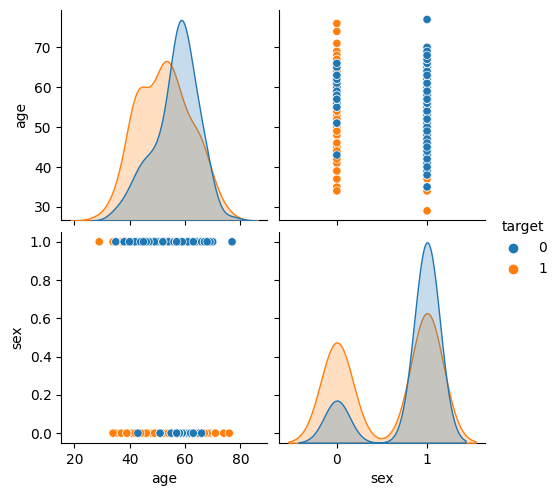

In [110]:
sns.pairplot(df,vars=['age', 'sex'], hue= 'target')

plt.ioff

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

y_train

289    0
235    0
14     1
152    1
237    0
      ..
218    0
228    0
259    0
189    0
80     1
Name: target, Length: 272, dtype: int64

In [97]:
from sklearn.svm import SVC

clf =SVC()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1])

In [98]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred,y_test))

0.7096774193548387
